## scikit-learn digits dataset example
add conv layers

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
import sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.GaussianKernel import GaussianKernel

# or copy and paste the definition of `GaussianKernel` here.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from keras.layers import Input, Embedding, LSTM, GRU, Dense, Dropout, Lambda, \
    Conv1D, Conv2D, Conv3D, \
    Conv2DTranspose, \
    AveragePooling1D, \
    MaxPooling1D, MaxPooling2D, MaxPooling3D, \
    GlobalAveragePooling1D, \
    GlobalMaxPooling1D, GlobalMaxPooling2D, \
    LocallyConnected1D, LocallyConnected2D, \
    concatenate, Flatten, Average, Activation, \
    RepeatVector, Permute, Reshape, Dot, \
    multiply, dot, add, \
    PReLU, \
    Bidirectional, TimeDistributed, \
    SpatialDropout1D, \
    BatchNormalization
from keras.models import Model, Sequential
from keras import losses
from keras.callbacks import BaseLogger, ProgbarLogger, Callback, History
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from keras import initializers
from keras.metrics import categorical_accuracy
from keras.constraints import maxnorm, non_neg
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras import backend as K

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

In [5]:
X_sc = X / 16.0
X_sc.shape

(1797, 64)

In [6]:
X_sc = X_sc.reshape((-1, 8, 8, 1))
X_sc.shape

(1797, 8, 8, 1)

0

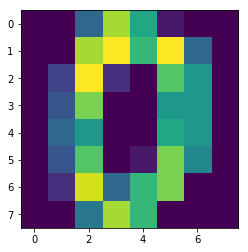

In [7]:
plt.imshow(X_sc[0,:,:,0])
y[0]

In [8]:
y_cat = to_categorical(y)
y_cat

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

### create model

In [9]:
np.random.seed(0)
num_lm = 100
num_lm2 = 20

def make_modelz():
    inp = Input(shape=(8, 8, 1), name='inp')
    oup = inp
    
    oup = Conv2D(32, (2, 2), activation="relu")(oup)
    oup = Conv2D(32, (2, 2), activation="relu")(oup)
    model_2d = Model(inp, oup)
    oup = MaxPooling2D(pool_size=(2,2))(oup)
    oup = Flatten()(oup)
    
    oup_gk1 = GaussianKernel(num_lm, 288, kernel_gamma=1./(2.*288*0.1), name='gkernel1')(oup)
    model_gk1 = Model(inp, oup_gk1)
    
    oup_gk2 = GaussianKernel(num_lm2, num_lm, kernel_gamma=1./(2.*num_lm*0.1), name='gkernel2')(oup_gk1)
    model_gk2 = Model(inp, oup_gk2)
    
    oup = Dense(10, activation='softmax')(oup_gk2)
    
    model = Model(inp, oup)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return {
        'model': model,
        'model_gk1': model_gk1,
        'model_gk2': model_gk2,
        'model_2d': model_2d,
    }

models = make_modelz()
model = models['model']
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
gkernel1 (GaussianKernel)    (None, 100)               28800     
_________________________________________________________________
gkernel2 (GaussianKernel)    (None, 20)                2000      
__________

### train

In [10]:
model.fit(X_sc, y_cat, verbose=0,
          batch_size=32,
          epochs=150)

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### predict

In [11]:
y_pred = model.predict(X_sc)
y_pred

array([[  6.77400470e-01,   1.35054365e-01,   2.75029830e-04, ...,
          1.20175369e-04,   7.37001449e-02,   8.24716911e-02],
       [  1.52904600e-01,   3.33448440e-01,   3.12547083e-04, ...,
          8.27911135e-04,   2.30905935e-01,   1.67168528e-01],
       [  1.03477360e-05,   1.08444225e-02,   3.13299656e-01, ...,
          1.33258075e-01,   3.07239145e-02,   5.30754328e-02],
       ..., 
       [  5.48803146e-05,   4.44568545e-02,   5.93882345e-04, ...,
          3.50785665e-02,   5.72171025e-02,   3.96980196e-02],
       [  2.69618221e-02,   2.07688347e-01,   9.31876060e-03, ...,
          4.75580897e-03,   2.33271003e-01,   2.57932484e-01],
       [  5.39542641e-04,   1.15782008e-01,   3.94408731e-03, ...,
          3.60086672e-02,   1.57116920e-01,   1.29454538e-01]], dtype=float32)

In [12]:
confusion_matrix(y, np.argmax(y_pred, axis=1))

array([[173,   5,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4, 111,   0,   5,   0,   8,  12,   0,  20,  22],
       [  0,   0, 171,   4,   0,   2,   0,   0,   0,   0],
       [  0,   0,  16, 159,   0,   4,   0,   1,   1,   2],
       [  0,   0,   0,   0, 178,   0,   0,   3,   0,   0],
       [  0,   0,   1,   3,   3, 151,   3,  20,   0,   1],
       [  0,   0,   0,   0,   3,   1, 177,   0,   0,   0],
       [  0,   0,   2,   0,   2,   4,   0, 171,   0,   0],
       [  1,  51,   0,  10,   0,  18,   5,   0,  63,  26],
       [  0,  15,   0,  41,   0,  21,   4,   0,   4,  95]])

In [13]:
print(classification_report(y, np.argmax(y_pred, axis=1)))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       178
          1       0.61      0.61      0.61       182
          2       0.90      0.97      0.93       177
          3       0.72      0.87      0.79       183
          4       0.96      0.98      0.97       181
          5       0.72      0.83      0.77       182
          6       0.88      0.98      0.93       181
          7       0.88      0.96      0.91       179
          8       0.72      0.36      0.48       174
          9       0.65      0.53      0.58       180

avg / total       0.80      0.81      0.80      1797



### plot output of Conv layer

In [14]:
pred_conv = models['model_2d'].predict(X_sc)
pred_conv.shape

(1797, 6, 6, 32)

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


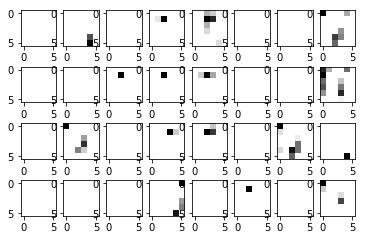

In [15]:
nrows=4
ncols=8
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[0][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

### plot output of GaussianKernel layer #1

In [16]:
lm2 = model.get_layer('gkernel2').get_weights()[0]
lm2.shape

(20, 100)

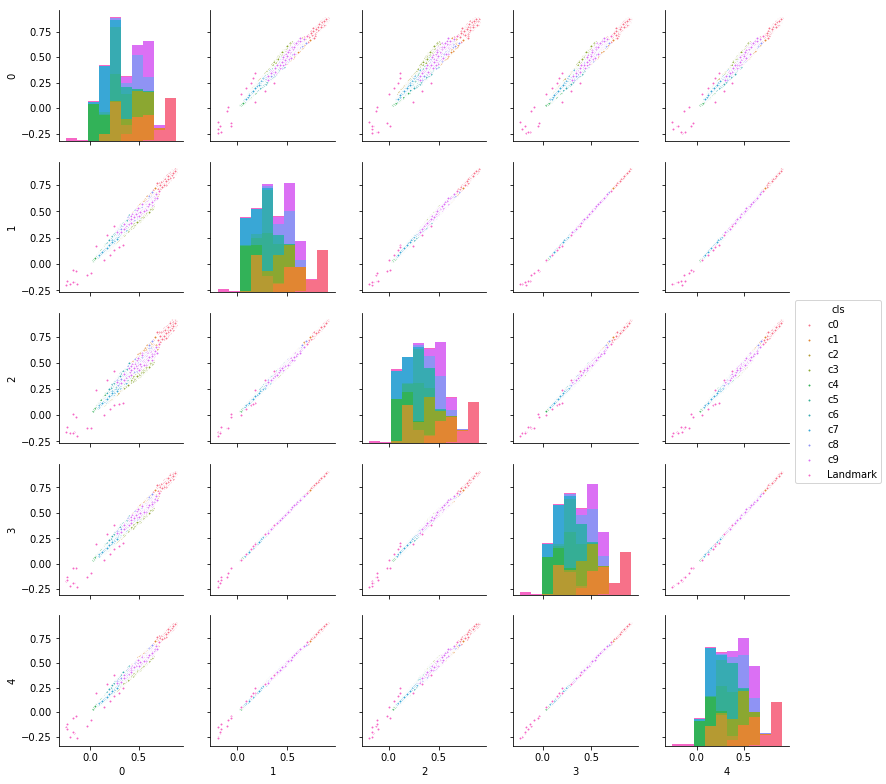

In [17]:
gk1_pred = models['model_gk1'].predict(X_sc, batch_size=1024)
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,:5])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

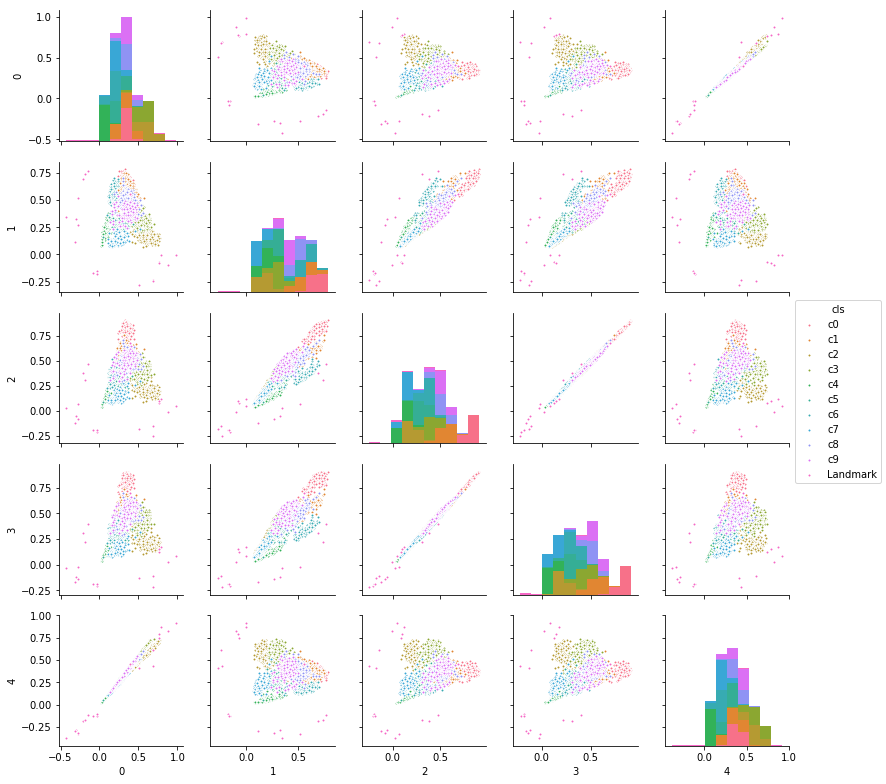

In [18]:
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,50:55])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

### plot output of GaussianKernel layer #2

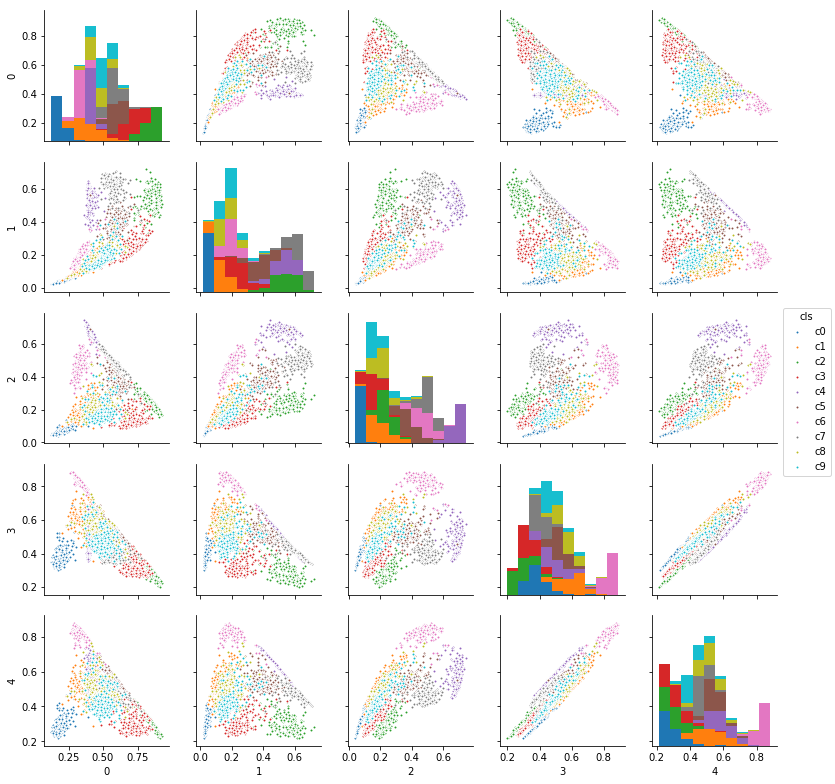

In [19]:
gk2_pred = models['model_gk2'].predict(X_sc)
df = pd.DataFrame(gk2_pred[:,:5])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

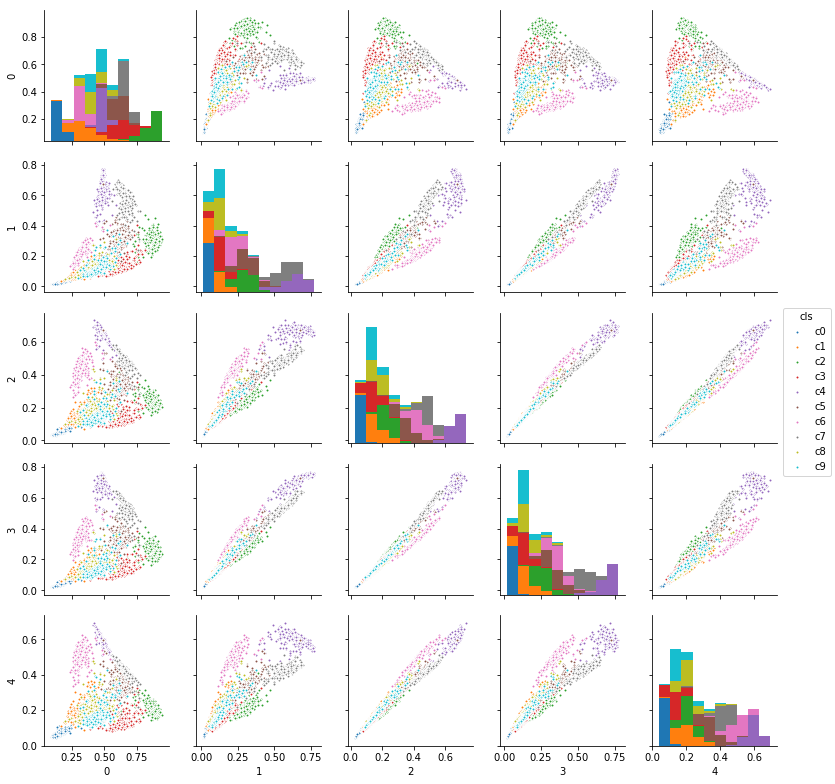

In [20]:
df = pd.DataFrame(gk2_pred[:,5:10])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)